In [200]:
import networkx as nx
import random
#import matplotlib.pyplot as plt

In [201]:
def plot_graph(G):
    nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

2 [{1, 2, 5}, {3, 4}]


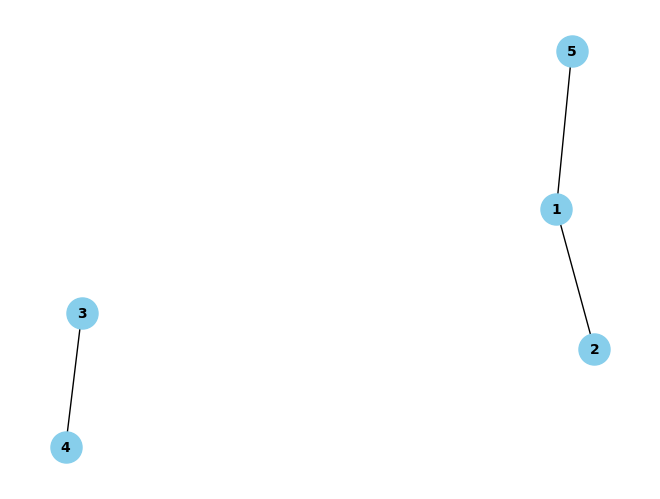

In [202]:
G = nx.Graph()

nodes = [1, 2, 3, 4, 5]

G.add_nodes_from(nodes)

edges = [(1, 2), (3, 4), (1, 5)]

G.add_edges_from(edges)

nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

cc_nx = list(nx.connected_components(G))
no_cc = len(cc_nx)
print(no_cc, cc_nx)

In [203]:
def in_any_set(k, cc):
    for i, _set in enumerate(cc):
        if k in _set:
            return True
    return False

In [204]:
def which_set(k, cc):
    for i, _set in enumerate(cc):
        if k in _set:
            return i
    return None

In [205]:
# test the functions
cc = [(1, 0, 4), (2, 3)]

print("in_any_set \n")
for i in range(7):
    print(in_any_set(i, cc))

print("\nwhich_set \n")
for i in range(7):
    print(which_set(i, cc))

in_any_set 

True
True
True
True
True
False
False

which_set 

0
0
1
1
0
None
None


In [206]:
def my_connected_components(graph):
    cc = []
    for v, edges in graph.items():
        if not in_any_set(v, cc) and edges != []:
            cc.append(set([v]))
            for edge in edges:
                if not in_any_set(edge, cc):
                    cc[which_set(v, cc)].add(edge)
    return cc

def my_no_connected_components(graph):
    return len(my_connected_components(graph))

In [207]:
VERTS = nodes.copy()
EDGES = edges.copy()
g = {i: [j for j in VERTS if j!=i and (i, j) in EDGES or (j, i) in EDGES] for i in VERTS}

print(my_no_connected_components(g), my_connected_components(g))

2 [{1, 2, 5}, {3, 4}]


In [208]:
def convert_G(G):
    dict = {}
    
    for node in G.nodes():
        dict[node] = dict.get(node, []) 
        
    for edge in G.edges():
        v1, v2 = edge[0], edge[1]
        dict.get(v1).append(v2)
        dict.get(v2).append(v1)

    return dict

In [209]:
print(g)
print(convert(G))
print(g == convert(G))

{1: [2, 5], 2: [1], 3: [4], 4: [3], 5: [1]}
{1: [2, 5], 2: [1], 3: [4], 4: [3], 5: [1]}
True


In [210]:
cc_nx = list(nx.connected_components(G))
no_cc = len(cc_nx)
print(no_cc, cc_nx)

2 [{1, 2, 5}, {3, 4}]


In [211]:
print(my_no_connected_components(convert(G)) == len(list(nx.connected_components(G))))

True


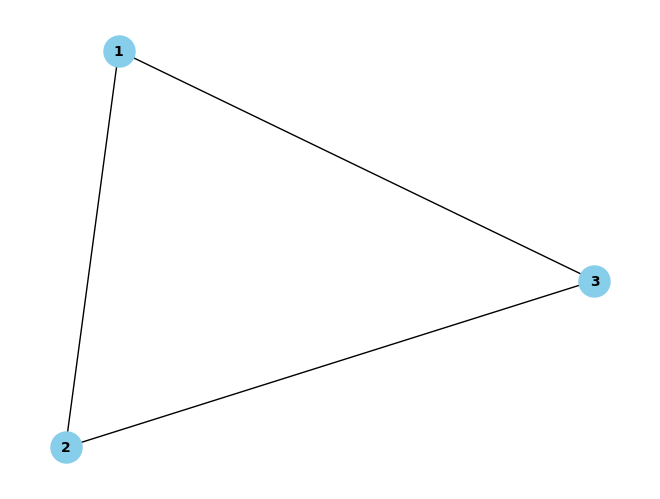

In [212]:
def generate_random_graph():
    size = 10
    
    G = nx.Graph()

    no_nodes = random.randint(3, size)
    
    nodes = [i for i in range(1, no_nodes)]

    G.add_nodes_from(nodes)

    edges = []
    for i in range(size):
        edges.append(tuple(random.sample(nodes, 2)))

    G.add_edges_from(edges)
    return G
    
plot_graph(generate_random_graph())

In [213]:
def generate_random_graph():
    n = 7
    prob = 0.1
    V = list(range(1, n+1))
    E = [(i, j) for i in V for j in V if i<j and random.random() < prob]
    return V, E

generate_random_graph()

([1, 2, 3, 4, 5, 6, 7], [(3, 5), (3, 7), (4, 5)])

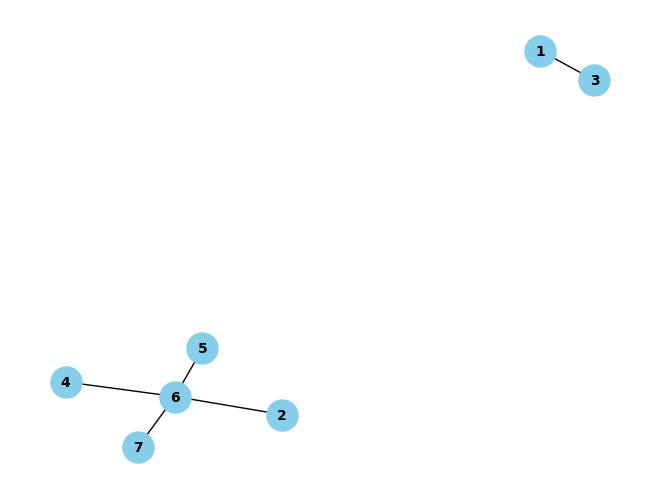

In [214]:
V, E = generate_random_graph()

def convert_to_G(E):
    G = nx.Graph()
    G.add_edges_from(E)
    return G

convert_to_G(E)
plot_graph(convert_to_G(E))

[{3, 4}] [{3, 4}]
1 1
{1: [], 2: [], 3: [4], 4: [3], 5: [], 6: [], 7: []}


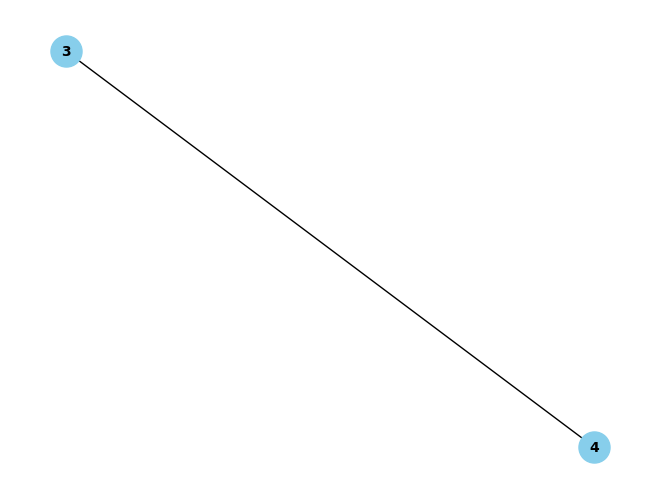

[{1, 2, 3, 5, 6}] [{1, 5}, {2, 3}, {6}]
1 3
{1: [5], 2: [3, 5], 3: [2], 4: [], 5: [1, 2, 6], 6: [5], 7: []}


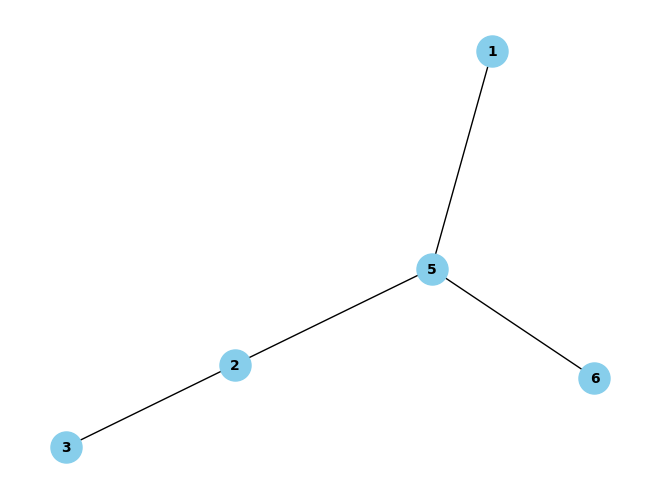

[{1, 4}, {2, 5}] [{1, 4}, {2, 5}]
2 2
{1: [4], 2: [5], 3: [], 4: [1], 5: [2], 6: [], 7: []}


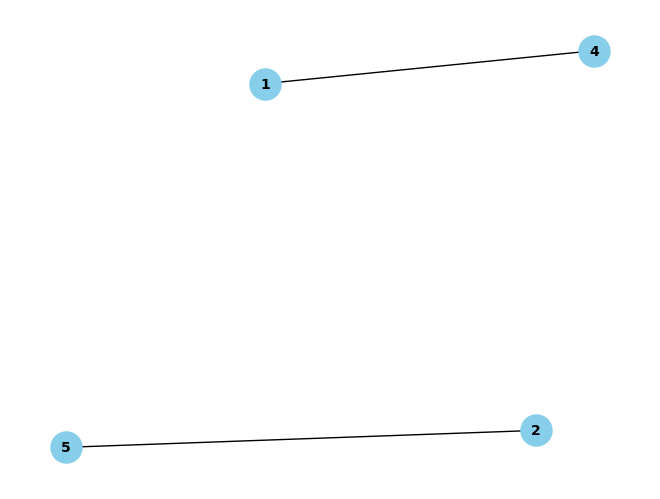

[] []
0 0
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}


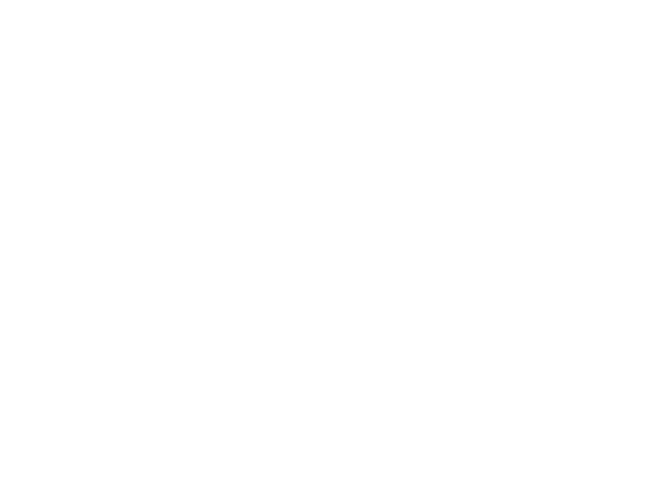

[{5, 6, 7}] [{5, 6}, {7}]
1 2
{1: [], 2: [], 3: [], 4: [], 5: [6], 6: [5, 7], 7: [6]}


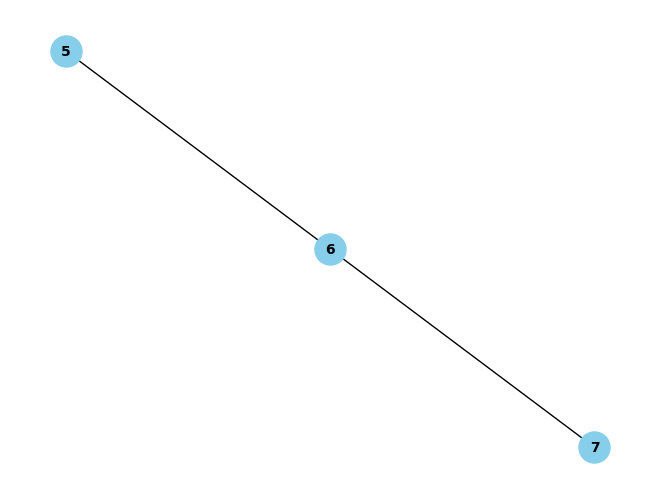

[{2, 5}] [{2, 5}]
1 1
{1: [], 2: [5], 3: [], 4: [], 5: [2], 6: [], 7: []}


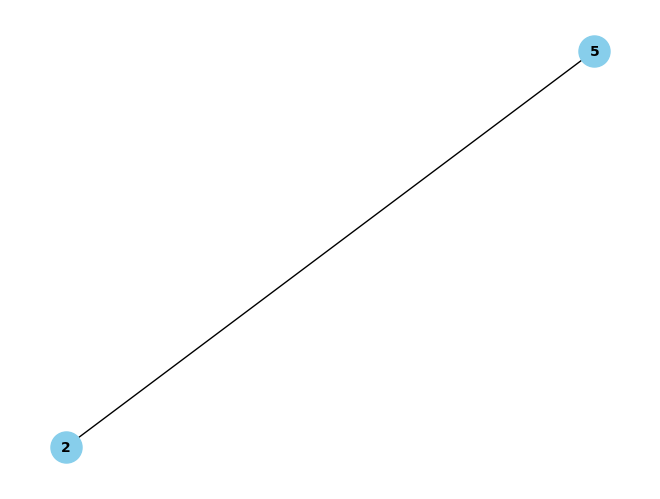

In [216]:
for _ in range(6):
    VERTS, EDGES = generate_random_graph()
    g = {i: [j for j in VERTS if j!=i and (i, j) in EDGES or (j, i) in EDGES] for i in VERTS}
    G = convert_to_G(EDGES)
    print(list(nx.connected_components(G)), my_connected_components(g))
    print(len(list(nx.connected_components(G))), my_no_connected_components(g))
    print(g)
    plot_graph(G)
    plt.show()